In [126]:
%matplotlib inline 
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns
import math
import json
import time
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
import warnings; warnings.simplefilter('ignore')

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Unsupervised Learning/')

In [129]:
df = pd.read_csv('Qualitative_Bankruptcy.data.txt', names= col)
print(df.shape)

(250, 7)


In [130]:
df.head(10)

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,target
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
5,A,A,P,P,P,A,NB
6,P,P,A,P,P,P,NB
7,P,P,P,A,A,P,NB
8,P,P,A,P,A,P,NB
9,P,P,A,A,P,P,NB


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial_Risk        250 non-null    object
 1   Management_Risk        250 non-null    object
 2   Financial_Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating_Risk         250 non-null    object
 6   target                 250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [133]:
pd.value_counts(df['target'])

NB    143
B     107
Name: target, dtype: int64

In [134]:
df.replace({'P' : 1, 'A' : 0, 'N' : -1, 'B' : 0, 'NB' : 1}, inplace=True)
df.head()

,Industrial_Risk,Management_Risk,Financial_Flexibility,Credibility,Competitiveness,Operating_Risk,target
0,1,1,0,0,0,1,1
1,-1,-1,0,0,0,-1,1
2,0,0,0,0,0,0,1
3,1,1,1,1,1,1,1
4,-1,-1,1,1,1,-1,1


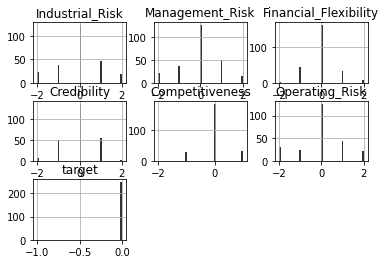

In [138]:
 df.diff().hist(color="k", alpha=0.8, bins=50);

In [139]:

X = df.drop("target" , axis=1)

y = df['target']

Split the dataset into training and test data train 80 % and test 20%

In [140]:
from sklearn.model_selection import train_test_split
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=.20, random_state=1)

Apply PCA on the independent features of train data.

In [141]:
from scipy.stats import zscore
X_p = train_set.apply(zscore)

In [142]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_p)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [143]:
pca.components_

array([[ 0.2659426 ,  0.33347355,  0.48174247,  0.48459943,  0.54086354,
         0.24212421],
       [-0.59062087, -0.40429833,  0.33348871,  0.27748678,  0.21861727,
        -0.50169981],
       [-0.56170369, -0.07162781, -0.20576748,  0.33298399, -0.11530248,
         0.71613209],
       [-0.38014816,  0.83579648, -0.12074163,  0.10097427, -0.16670313,
        -0.32305934],
       [ 0.25501963, -0.12628462, -0.68920856,  0.59347521,  0.15194525,
        -0.26212317],
       [-0.2353356 ,  0.07552579, -0.35324529, -0.46354882,  0.77168722,
         0.06125443]])

In [144]:
pca.explained_variance_

array([2.63310162, 1.10348142, 0.90979463, 0.74348799, 0.40535645,
       0.23492863])

Elbow plot to find out reduced number of dimensions

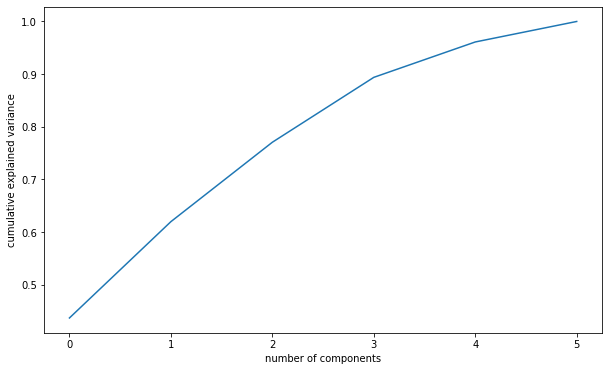

In [166]:
fig = plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Transform the data using PCA

In [148]:
from sklearn.decomposition import PCA
pcatrans = PCA(n_components = 3)

In [150]:
pcatrans.fit(X_p)
x_train = pca1.fit_transform(X_p)


X_test_p = test_set.apply(zscore)
x_test = pca1.transform(X_test_p)

 Apply KMeans algorithm on the above transformed data

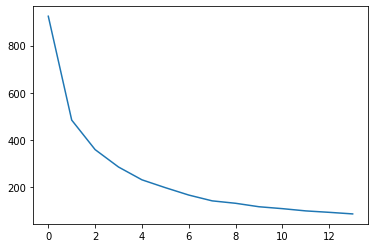

In [152]:
from sklearn import metrics
from sklearn.cluster import KMeans

l = []
for num_clusters in list(range(1,15)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(x_train)
    l.append(model_clus.inertia_)

plt.plot(l)

 Select optimal number of clusters and form clusters out of the train data

In [153]:
kmeans = KMeans(n_clusters = 2, max_iter=50, random_state= 2) # although the elbow seems to be at around 5,we picked 2 clusters,
                                                               #because our target class has two levels
kmeans.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [154]:
kmeans.cluster_centers_

array([[ 1.31475192,  0.19040931,  0.00430858],
       [-1.63974677, -0.23747678, -0.00537362]])

In [155]:
y_train_pca = kmeans.predict(x_train)

In [156]:
y_train_pca

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=int32)

In [157]:
y_test_pca = kmeans.predict(x_test)

Create a new column in the train data and populate it with the cluster labels.

In [158]:
X_train_pca = pd.DataFrame(x_train, columns=['pc1','pc2','pc3'])
X_test_pca = pd.DataFrame(x_test, columns=['pc1','pc2','pc3'])

In [159]:
X_train_pca['cluster_label'] = y_train_pca

In [160]:
X_test_pca['cluster_label'] = y_test_pca

In [161]:
X_train_pca.head(6)

,pc1,pc2,pc3,cluster_label
0,-1.717363,-0.515573,-0.861955,1
1,-0.323897,-0.681491,0.617165,1
2,1.144908,2.703561,-0.046549,0
3,-1.588812,0.464417,1.151682,1
4,-1.310688,-1.008619,-0.949306,1
5,1.998325,-1.653392,-0.105755,0


In [162]:
X_test_pca.head(6)

,pc1,pc2,pc3,cluster_label
0,0.338037,-0.328772,-1.138772,0
1,-0.969095,-0.986342,-0.497167,1
2,-1.335740,-0.958708,-0.723685,1
3,-2.152009,0.030924,-0.548356,1
4,2.110880,-0.714232,0.640697,0
5,-1.437525,-1.144251,-1.283069,1


using logistic regression classification method

In [163]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_pca, train_labels)

result = model.score(X_train_pca, train_labels)
print(result)

0.985


accuracy and confusion matrix.

In [164]:
result = model.score(X_test_pca, test_labels)
print(result)

1.0


In [165]:
y_predict = model.predict(X_test_pca)
metrics.confusion_matrix(test_labels, y_predict)

array([[21,  0],
       [ 0, 29]])